# Bayesian inference tutorial: a hello world example

The goal is to find a statistical model with its parameters that explains the data.

So, let's assume we've got some data, regarding the height of Python developers.

This is our data: 

In [11]:
x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

### Deciding a model

The first thing once we've got some data is decide which is the model that generated the data. In this case we decide that the height of Python developers comes from a *normal distribution*.

A normal distribution has two parameters, the mean $\mu$ and the standard deviation $\sigma$ (or the variance $\sigma^2$ which is equivalent, as it's just the square of the standard deviation).

Deciding which model to use can be obvious in few cases, but it'll be the most complex part of the statistical inference problem in many others. Some of the obvious cases are:
* The *Normal distribution* when modelling natural phenomena like human heights.
* The *Beta distribution* when modelling probability distributions.
* The *Poisson distribution* when modelling the frequency of events occurring.

In many cases we will use a combination of different distributions to explain how our data was generated.

Each of these distribution has parameters, \alpha and \beta for the *Beta distribution*, \lambda for the *Poisson*, or $\mu$ and $\sigma$ for the *normal distribution* of our example.

The goal of *inference* is to find the best values for these parameters.

### Evaluating a set of parameters

Before trying to find the best parameters, let's choose some arbitrary parameters, and let's evaluate them.

For example, we can choose the values $\mu=175$ and $\sigma=5$. And to evaluate them, we'll use the Bayes formula:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

Given a model, a *normal distribution* in this case, $P(\theta|x)$ is the probability that the parameters $\theta$ (which are $\mu$ and $\sigma$ in this case) given the data $x$.

The higher the probability of the parameters given the data, the better they are. So, this value is the score we will use to decide which are the best parameters $\mu$ and $\sigma$ for our data $x$, assuming data comes from a *normal distribution*.

### Parts of the problem

To recap, we have:
* **Data** $x$: [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
* A **model**: the *normal distribution*
* The **parameters** of the model: $\mu$ and $\sigma$

And we're interested in finding the best values for $\mu$ and $\sigma$ for the data $x$, for example $\mu=175$ and $\sigma=5$.

### Bayes formula

Back to Bayes formula for conditional probability:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

We already mentioned that $P(\theta|x)$ is the probability of the parameter values we're checking given the data $x$. And assuming our data is generated by the model we decided, the *normal distribution*. And this is the value we're interested in maximizing. In Bayesian terminology, $P(\theta|x)$ is known as the **posterior**.

The *posterior* is a function of three other values.

$P(x|\theta)$: the **likelihood**, which is the probability of obtaining the data $x$ if the parameters $\sigma$ were the values we're checking (e.g. $\mu=175$ and $\sigma=5$). And always assuming our data is generated by our model, the *normal distribution*.

$P(\theta)$: the **prior**, which is our knowledge about the parameters before seeing any data.

$P(x)$: the **evidence**, which is the probability of the data, not given any specific set of parameters $\sigma$, but given the model we choose, the *normal distribution* in the example.

### Likelihood

The likelihood is the probability of obtaining the data $x$ from the choosen model (e.g. the *normal distribution*) and for a specific set of parameters $\theta$ (e.g. $\mu=175$ and $\sigma=5$).

It is often represented as $\mathcal{L}(\theta|x)$ (note that the order of $\theta$ and $x$ is reversed to when the probability notation is used).

In the case of a normal distribution, the formula to compute the probability given $x$ (its probability density function) is:

$$P(x|\theta) = P(x| \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

If we plot it, we obtain the famous normal bell curve (we use $\mu=0$  and $\sigma=1$ in the plot):

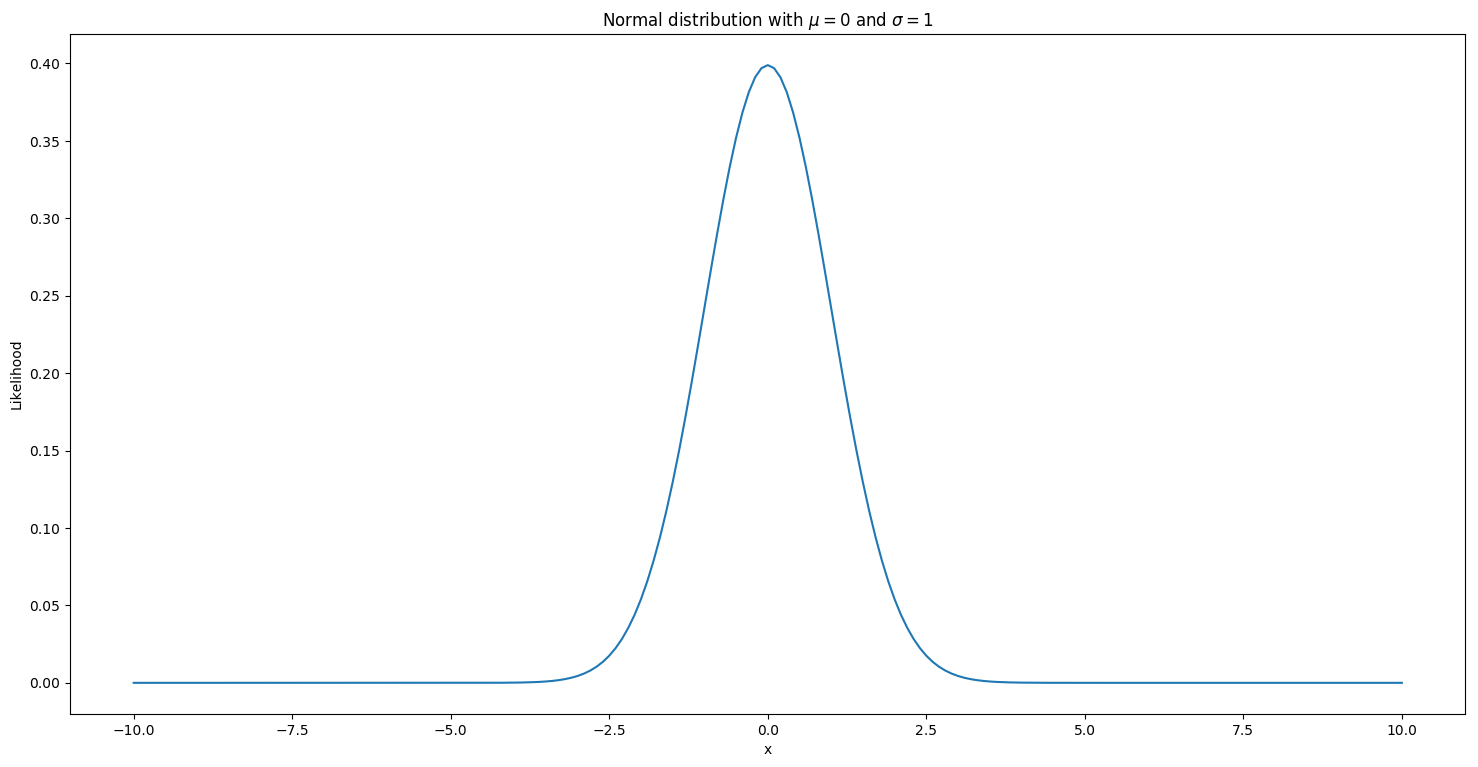

In [15]:
import numpy
import scipy.stats
from matplotlib import pyplot

mu = 0.
sigma = 1.

x = numpy.linspace(-10., 10., 201)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=0$ and $\sigma=1$');

Following the example, we wanted to score how good are the parameters $\mu=175$ and $\sigma=5$ for our data. So far we choosen these parameters arbitrarily, but we'll choose them in a smarter way later on.

If we take the probability density function (p.d.f.) of the *normal distribution* and we compute for the first data point of $x$ 183, we have:

$$P(x| \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

where $\mu=175$, $\sigma=5$ and $x=183$, so:

$$P(x=183| \mu=175, \sigma=5)  = \frac{1}{\sqrt{2 \cdot \pi \cdot 5^2}} \cdot e^{-\frac{(183 - 175)^2}{2 \cdot 5^2}}$$

If we do the math:

In [24]:
import math

1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))

0.022184166935891113

This is the probability that 183 was generated by a *normal distribution* with mean 175 and standard deviation 5.

With *scipy* we can easily compute the likelihood of all values in our data:

In [22]:
import scipy.stats

mu = 175
sigma = 5

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x, mu, sigma)

array([ 0.02218417,  0.02994549,  0.07365403,  0.04839414,  0.07978846,
        0.07365403,  0.06664492,  0.01579003,  0.07820854,  0.06664492])

### Prior

The prior is our knowledge of the parameters before we observe the data. It's probably the most subjective part of Bayesian inference, and different approaches can be used.

We can use informed priors, and try to give the model as much information as possible. Or use uninformed priors, and let the process find the parameters using mainly the data.

In our case, we can start thinking on which are the possible values for a normal distribution.

For the *mean*, the range is between $-\infty$ and $\infty$. But we can of course do better than this.

We're interested on the mean of Python developers height. And it's easy to see that the minimum possible height is $0$. And for the maximum, we can start by considering the maximum known human height. This is 272 cms, the maximum measured height of Robert Pershing Wadlow, born in 1918. We can be very confident that the mean of the height of Python developers is in the range $0$ to $272$. So, a first option for an *uninformed* prior could be all the values in this range with equal probability.

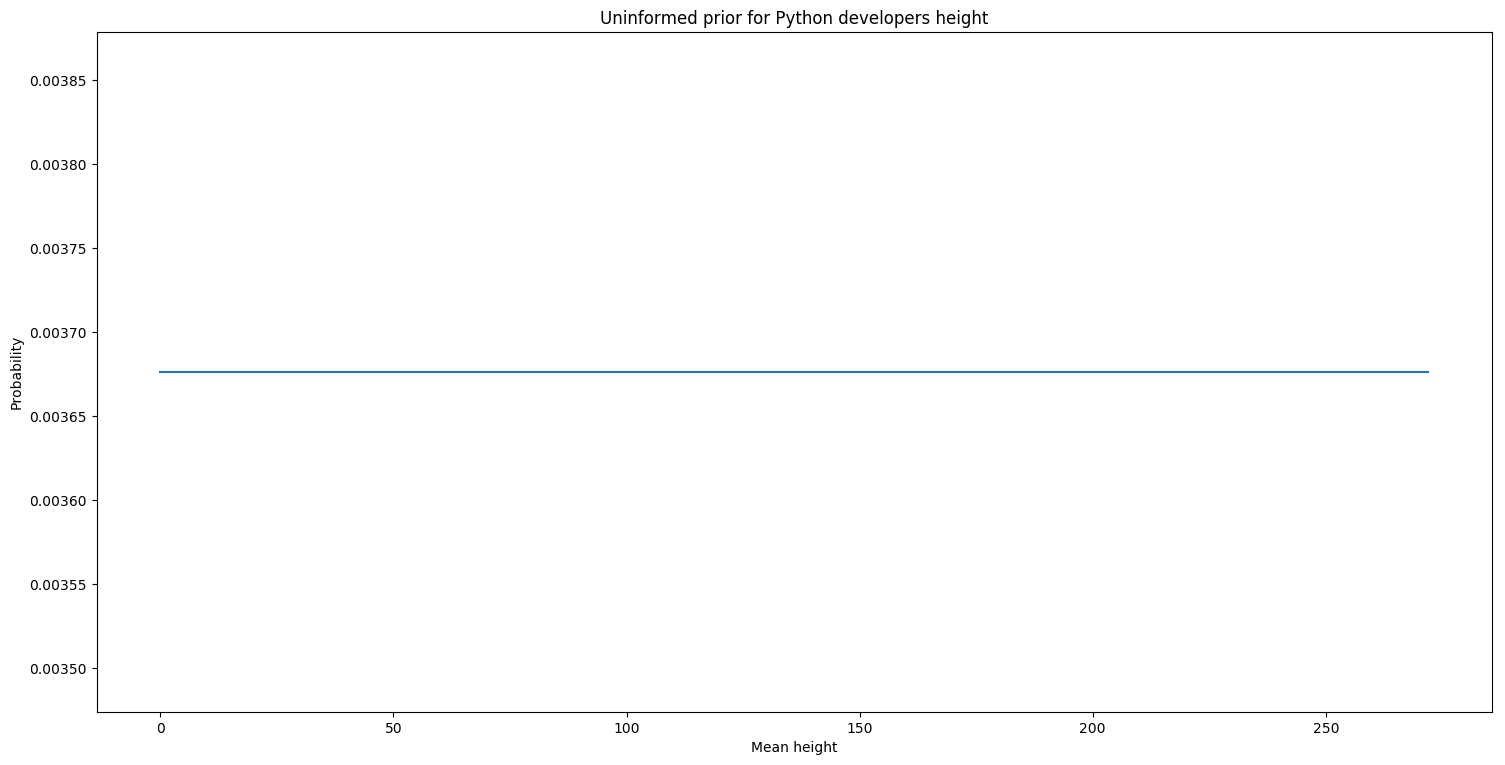

In [32]:
import numpy
import scipy.stats
from matplotlib import pyplot

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.uniform.pdf(mean_height, 0, 272)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Uninformed prior for Python developers height');

This could work, but we can do better. Just having 10 data points, the amount of information that we can *learn* from them is quite limited. And we may *use* these 10 data points to discover something we already know. That the probability of the mean height being 0 is nil, as it is the probability of the maximum ever observed height. And that the probability of a value like 175 cms is much higher than the probability of a value like 120 cms.

If we know all this before observing any data, why not use it? This is exactly what a prior is. The tricky part is defining the exact prior.

In this case, we don't know the mean of the height of Python developers, but we can check the mean of the height of the world population, which is arond 165. This doesn't need to be the value we're looking for. It's known that there are more male than female Python programmers. And male height is higher, so the value we're looking for will probably be higher. Also, height changes from country to country, and Python programmers are not equally distributed around the world. But we will use our data to try to find the value that contains all these biases. The prior is just a starting point that will help find the value faster.

So, let's use the mean of the world population as the mean of our prior, and we'll take the standard deviation of the world population, 7 cms, and we'll use the double of it. Multiplying it by 2 is arbitrary, but we'll make our prior a bit less *informed*. As mentioned before, choosing a prior is quite subjective.

Note that it's not necessary to use a normal distribution for the prior. We were considering a uniform distribution before. But in this case it can make sense, as we're more sure than the mean we're looking for will be close to the mean of the human population.

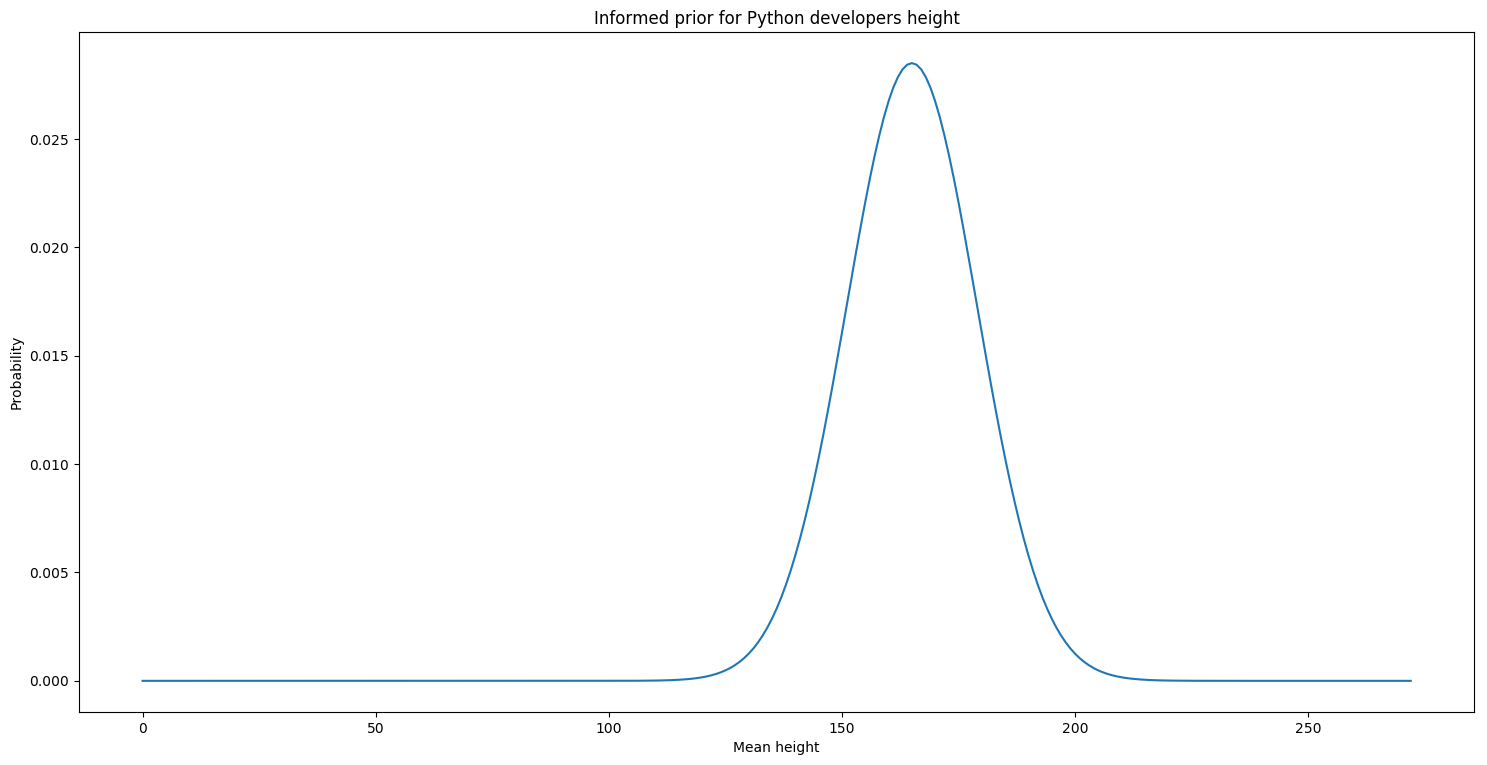

In [33]:
import numpy
import scipy.stats
from matplotlib import pyplot

world_height_mean = 165
world_height_standard_deviation = 7

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.norm.pdf(mean_height, world_height_mean, world_height_standard_deviation * 2)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for Python developers height');

### Evidence

The evidence is the probability of the data $P(x)$. The whole Bayesian formula assumes the model we choose, so it can be seen as the probability of the model coming from a *normal distribution* (or any distribution or combination of them we're using for the problem).

We can see the probability of the data coming from a *normal distribution* like the sum of the probabilities of the data coming from each of the possible parameters.

If we consider the height a *discrete* variable, and the range of its values $0$ to $272$. And we ignore that the normal has the *standard deviation* parameter, this could be expressed as:

$$P(x) = \sum_{i=0}^{272} P(x|\mu_i)$$

Each of the probabilities $P(\mu_i)$ is a *likelihood*, and we've already seen how to compute them.

In practise, we can't ignore the simplifications we made. We first need to consider the *standard deviation*. Then we need to consider that both are *continuous* and not *discrete*. Being continuous means that instead of a sum, we have an integral. And finally, we will consider the interval $-\infty$ yo $\infty$ instead of $0$ to $272$.

The actual equation considering these things is:

$$P(x) = \int_{-\infty}^{\infty} P(x|\theta) \cdot d\theta$$

Mathematically, this equation is more complex than the previous, but conceptually they are the same.

### Grid based Bayesian inference

TODO

### MCMC

TODO